In [1]:
from pyexpat import features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('future.no_silent_downcasting', True)

In [8]:
data = pd.read_excel('/content/drive/MyDrive/Datasets/PE-Data Mining Shoe Dataset.xlsx', index_col=False)
print("\n\n\nSample dataset :- \n\n", data.head() )




Sample dataset :- 

   RECEIPT_DATE   ITEM       BARCODE ARTICLE_NAME   Colour SIZE     BRAND   P_GROUP            EAN LETHR_TYPE SEASON INDICATOR  QTY  GROSS_VALUE  DIS%  DISC_VALUE  NET_VALUE
0   2015-08-06  57390  7.133049e+12     7133-515    BLACK   38   TIPTOPP  FOOTWEAR  8903930389998     PU CFB    S14         B    1          499   0.0         0.0      499.0
1   2015-08-06  62848  5.555929e+12         9736    GREEN   36   GLIDERS  FOOTWEAR  8903930424569        EVA    W14         D    1          499   0.0         0.0      499.0
2   2015-08-06  71405  9.952018e+12     ADVENT-1  OLGREEN    5   FOOTFUN  FOOTWEAR  8903930676890     PU CFB    S15         A    1          599   0.0         0.0      599.0
3   2015-08-06  65259  5.555902e+12     LY-10420     PINK   38  FORCE 10  FOOTWEAR  8903930408866     PU CFB    S14         D    1         1599   0.0         0.0     1599.0
4   2015-08-06  55228  2.212005e+12       RS-016   D.GREY    8  FORCE 10  FOOTWEAR  8903930335025     PU CFB   

## **Starting EDA and Data Cleaning**

In [9]:
print("\n\n\nShape of the dataset = ", end="")
print( data.shape)




Shape of the dataset = (37762, 17)


In [10]:
print("\n\n\n Sample data decription : \n")
print( data.describe() )




 Sample data decription : 

                        RECEIPT_DATE           ITEM       BARCODE           QTY  GROSS_VALUE          DIS%    DISC_VALUE     NET_VALUE
count                          37762   37762.000000  3.760200e+04  37762.000000  37762.00000  37762.000000  37762.000000  37762.000000
mean   2018-03-25 17:10:51.893437696   49782.497670  5.540830e+12      1.031831    833.08686      5.984071     65.303467    767.783393
min              2015-08-06 00:00:00      78.000000  2.201800e+04     -3.000000  -6597.00000    -29.900000   -494.850000  -6597.000000
25%              2017-04-23 00:00:00   34234.750000  2.193009e+12      1.000000    349.00000      0.000000      0.000000    320.000000
50%              2018-04-22 00:00:00   51988.000000  5.555087e+12      1.000000    499.00000      0.000000      0.000000    499.000000
75%              2019-03-26 00:00:00   66291.000000  8.017056e+12      1.000000    999.00000      0.000000      0.000000    999.000000
max              2020-03

###According to project requirement we don't need Barcode and EAN column as it is of no help to us, item no. acts as primary key

In [11]:
data.drop('BARCODE', axis = 1, inplace = True)
data.drop('EAN', axis = 1, inplace = True)

### Finding out NULL values

In [12]:
print("\n\n",data.isnull().sum())



 RECEIPT_DATE       0
ITEM               0
ARTICLE_NAME       0
Colour           185
SIZE            2988
BRAND             51
P_GROUP           39
LETHR_TYPE      3020
SEASON          5688
INDICATOR       2322
QTY                0
GROSS_VALUE        0
DIS%               0
DISC_VALUE         0
NET_VALUE          0
dtype: int64


###Observing Color column

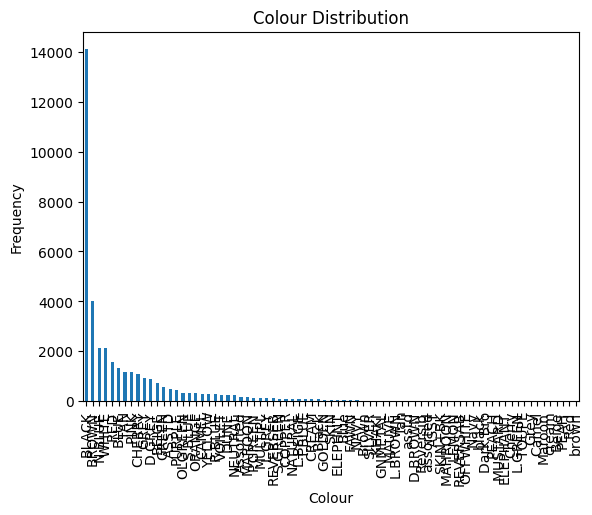

In [13]:
data['Colour'].value_counts().plot(kind='bar')
plt.title('Colour Distribution')
plt.xlabel('Colour')
plt.ylabel('Frequency')
plt.show()

### For colour column we can use mode value to fill null positions  as it is skewed way too much

In [14]:
data['Colour'] = data['Colour'].fillna(data['Colour'].mode()[0])

### Observing Size columns

In [15]:
print(data['SIZE'].unique())

[38 36 5 8 '08C' 41 40 3 6 42 10 9 32 '13C' '12C' 29 33 '7C' 7 2 39 43
 '11C' 37 4 1 31 45 '07C' 30 44 11 '10C' '8C' '9C' 25 24 nan '05C' '09C'
 '06C' 35 26 27 28 23 46 '04C' 34 22 '6C' '5C' 12 '3C' '(08' '4C' '(07']


In [16]:
data["SIZE"] = data["SIZE"].astype(str).str.strip().str.upper()  # Removing spaces & normalize case

### Cleaning incorrect formats like '(08'

In [17]:
data['SIZE'] = [str(size).strip("()") if isinstance(size, str) else size for size in data['SIZE']]

### Creating a mapping
### Shoe size to cm mapping based on US, UK, and EU sizes

In [18]:
size_to_cm = {
     "38": 24.0, "36": 23.0, "5": 22.5, "8": 26.0, "08C": 15.0, "41": 26.5,
     "40": 25.5, "3": 21.5, "6": 23.5, "42": 27.0, "10": 28.0, "9": 27.5,
     "32": 20.0, "13C": 19.0, "12C": 18.5, "29": 17.0, "33": 20.5,
     "7C": 14.0, "7": 24.5, "2": 21.0, "39": 25.0, "43": 27.5,
     "11C": 17.5, "37": 23.5, "4": 22.0, "1": 20.5, "31": 19.5,
     "45": 29.0, "07C": 13.5, "30": 18.0, "44": 28.0, "11": 29.0,
     "10C": 16.5, "8C": 14.5, "9C": 15.5, "25": 15.0, "24": 14.5,
     "05C": 12.0, "09C": 15.0, "06C": 13.0, "35": 22.5, "26": 16.0,
     "27": 16.5, "28": 17.0, "23": 14.0, "46": 29.5, "04C": 11.5,
     "34": 21.0, "22": 13.5, "6C": 13.5, "5C": 12.5, "12": 30.0,
     "3C": 11.0, "4C": 11.5, "08" : 26.0, "07" : 24.5
 }

### Mapping sizes to centimeters and fill missing values with "Unknown"

In [20]:
data["SIZE"] = data["SIZE"].map(size_to_cm).fillna("Unknown")

In [22]:
#Verifying
data['SIZE'].unique()

array([24.0, 23.0, 22.5, 26.0, 15.0, 26.5, 25.5, 21.5, 23.5, 27.0, 28.0,
       27.5, 20.0, 19.0, 18.5, 17.0, 20.5, 14.0, 24.5, 21.0, 25.0, 17.5,
       22.0, 19.5, 29.0, 13.5, 18.0, 16.5, 14.5, 15.5, 'Unknown', 12.0,
       13.0, 16.0, 29.5, 11.5, 12.5, 30.0, 11.0], dtype=object)

### Mapping has been created and implemented to the data frame. Now we will handle null values.
### I have changed all NAN values to Unknown
### We will fill NAN values with mode(Categorical)

In [26]:
mode_value = data["SIZE"].mode()[0]
data["SIZE"] = data["SIZE"].replace("Unknown", mode_value)

In [27]:
#Verifying
data['SIZE'].unique()

array([24. , 23. , 22.5, 26. , 15. , 26.5, 25.5, 21.5, 23.5, 27. , 28. ,
       27.5, 20. , 19. , 18.5, 17. , 20.5, 14. , 24.5, 21. , 25. , 17.5,
       22. , 19.5, 29. , 13.5, 18. , 16.5, 14.5, 15.5, 12. , 13. , 16. ,
       29.5, 11.5, 12.5, 30. , 11. ])

In [28]:
data.isnull().sum()

,0
RECEIPT_DATE,0
ITEM,0
ARTICLE_NAME,0
Colour,0
SIZE,0
BRAND,51
P_GROUP,39
LETHR_TYPE,3020
SEASON,5688
INDICATOR,2322


### Observing P_GROUP column

In [29]:
data['P_GROUP'].unique()

array(['FOOTWEAR', 'ACCESSORIES', nan], dtype=object)


### I observed that P_Group has two categories hence null values will have to be handled accordingly. If we randomly put mode/mean, there will be some footwear which might obtain brands of accessories.

### Printing the accessory brands

In [32]:
data[data['P_GROUP'] == 'ACCESSORIES']['BRAND'].unique()

array(['LFO', 'LSL', 'ACCESSORIES', nan], dtype=object)

### If the Brand is LFO or LSL we know its a ACCESSORIES

In [33]:
data.loc[data['P_GROUP'].isnull() & data['BRAND'].isin(['LFO', 'LSL']), 'P_GROUP'] = 'ACCESSORIES'

### If the BRAND is different from LFO or LSL we know its a footwear

In [34]:
data.loc[data['P_GROUP'].isnull() & ~data['BRAND'].isin(['LFO', 'LSL']), 'P_GROUP'] = 'FOOTWEAR'

In [36]:
data.isnull().sum()

,0
RECEIPT_DATE,0
ITEM,0
ARTICLE_NAME,0
Colour,0
SIZE,0
BRAND,51
P_GROUP,0
LETHR_TYPE,3020
SEASON,5688
INDICATOR,2322


### Observing Brand column

In [37]:
data['BRAND'].unique()

array(['TIPTOPP', 'GLIDERS', 'FOOTFUN', 'FORCE 10', 'SENORITA', 'PREFECT',
       'COOLERS', 'WINDSOR', 'FORTUNE', 'WARRIOR', 'LFO',
       'CUSTOMER BRAND', nan, 'A-HA', 'LSL', 'LUCY & LUKE', 'ACCESSORIES',
       'REBOUNCE', 'HEALERS', 'LEAP7X'], dtype=object)

### Using the same logic if the BRAND is None, and if we know that P_GROUP is ACCESSORY then we know that it is either LFO or LSL(we take the mode)

In [39]:
data.loc[data['BRAND'].isnull() & data['P_GROUP'].isin(['ACCESSORIES']), 'BRAND'] = 'LFO'

### And if the P_GROUP is footwear we know that is the companies other than LFO OR LSL(we take the mode between those all companies)

In [42]:
data.loc[data['BRAND'].isnull() & data['P_GROUP'].isin(['FOOTWEAR']), 'BRAND'] = 'GLIDERS'

### Observing Leather_Type column

In [43]:
data[data['LETHR_TYPE'].isnull()].head()

,RECEIPT_DATE,ITEM,ARTICLE_NAME,Colour,SIZE,BRAND,P_GROUP,LETHR_TYPE,SEASON,INDICATOR,QTY,GROSS_VALUE,DIS%,DISC_VALUE,NET_VALUE,P_GROUP_NUM
490,2015-09-28,44970,MB72502,BLACK,23.5,LFO,ACCESSORIES,NaN,NaN,D,1,110,0.0,0.0,110.0,NaN
579,2015-10-08,44970,MB72502,BLACK,23.5,LFO,ACCESSORIES,NaN,NaN,D,1,110,0.0,0.0,110.0,NaN
841,2015-11-01,57633,HC-201,NATURAL,23.5,LFO,ACCESSORIES,NaN,NaN,NaN,1,299,0.0,0.0,299.0,NaN
1028,2015-11-10,76346,AL-195,BLACK,23.5,LFO,ACCESSORIES,NaN,NaN,NaN,1,1299,0.0,0.0,1299.0,NaN
1039,2015-11-10,57633,HC-201,NATURAL,23.5,LFO,ACCESSORIES,NaN,NaN,NaN,1,299,10.0,29.9,269.1,NaN


### Filling the nan values of lethr type wherever p_group is accessories as not applicable as any accessory inherently wont have a leather type.

In [44]:
data.loc[data["P_GROUP"] == "ACCESSORIES", "LETHR_TYPE"] = "Not Applicable"

In [45]:
data[data['LETHR_TYPE'].isnull()].head()

,RECEIPT_DATE,ITEM,ARTICLE_NAME,Colour,SIZE,BRAND,P_GROUP,LETHR_TYPE,SEASON,INDICATOR,QTY,GROSS_VALUE,DIS%,DISC_VALUE,NET_VALUE,P_GROUP_NUM
2202,2016-01-19,78471,LB-014,GOLDEN,21.5,GLIDERS,FOOTWEAR,NaN,W15,A,1,249,0.0,0.0,249.0,NaN
2379,2016-01-29,78473,LB-014,GOLDEN,22.5,GLIDERS,FOOTWEAR,NaN,W15,A,1,249,0.0,0.0,249.0,NaN
2521,2016-02-04,78472,LB-014,GOLDEN,22.0,GLIDERS,FOOTWEAR,NaN,W15,A,1,249,0.0,0.0,249.0,NaN
2595,2016-02-08,79172,LBT-062,PINK,25.0,GLIDERS,FOOTWEAR,NaN,NaN,A,1,399,0.0,0.0,399.0,NaN
2654,2016-02-11,79104,LIM-F802N,RED,24.0,GLIDERS,FOOTWEAR,NaN,NaN,A,1,1199,0.0,0.0,1199.0,NaN


### For the rest of the values as this is categorical data we use mode

In [46]:
data['LETHR_TYPE'] = data['LETHR_TYPE'].fillna(data['LETHR_TYPE'].mode()[0])

In [47]:
data.isnull().sum()

,0
RECEIPT_DATE,0
ITEM,0
ARTICLE_NAME,0
Colour,0
SIZE,0
BRAND,0
P_GROUP,0
LETHR_TYPE,0
SEASON,5688
INDICATOR,2322


### Observing Seasons column

In [58]:
data.loc[data['SEASON'].isnull()].head()

,YEAR,MONTH,DATE,ITEM,ARTICLE_NAME,COLOUR,SIZE,BRAND,ITEM_TYPE,LEATHER_TYPE,SEASON,INDICATOR,QTY,GROSS_VALUE,DIS%,DISC_VALUE,NET_VALUE
490,2015,09,28,44970,MB72502,BLACK,23.5,LFO,ACCESSORIES,Not Applicable,NaN,D,1,110,0.0,0.0,110.0
507,2015,10,01,74371,7168-03,BLACK,26.0,FORTUNE,FOOTWEAR,PATINA,NaN,B,1,1999,10.0,199.9,1799.1
579,2015,10,08,44970,MB72502,BLACK,23.5,LFO,ACCESSORIES,Not Applicable,NaN,D,1,110,0.0,0.0,110.0
658,2015,10,16,75583,9906-10,ELEPHNT,27.5,FORCE 10,FOOTWEAR,NUBUCK,NaN,B,1,1799,0.0,0.0,1799.0
659,2015,10,16,75771,9906-10,WHITE,27.5,FORCE 10,FOOTWEAR,SOFTY,NaN,B,1,1799,0.0,0.0,1799.0


In [59]:
data['SEASON'].unique()

array(['S14', 'W14', 'S15', 'W13', 'S11', 'UNIVRSL', 'WINTER', 'W11',
       'SUMMER', 'S13', 'S12', 'W12', 'W15', nan, 'S16', 'W16', 'S17',
       'W17', 'S18', 'SS', 'AW', 'W10', 'S10', 'W18', 'S19', 'W19', 'S20'],
      dtype=object)

In [60]:
data['YEAR'].unique()

array(['2015', '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [61]:
data.loc[data['SEASON'] == 'S11'].head()

,YEAR,MONTH,DATE,ITEM,ARTICLE_NAME,COLOUR,SIZE,BRAND,ITEM_TYPE,LEATHER_TYPE,SEASON,INDICATOR,QTY,GROSS_VALUE,DIS%,DISC_VALUE,NET_VALUE
6,2015,08,06,37245,SHREEK-05,RED,15.0,FORCE 10,FOOTWEAR,PU CFB,S11,D,1,599,0.0,0.0,599.0
402,2015,09,20,27353,JONIX,OLGREEN,24.5,COOLERS,FOOTWEAR,PU CFB,S11,B,1,599,0.0,0.0,599.0
710,2015,10,20,28593,KIZASHI,S.BLUE,25.5,TIPTOPP,FOOTWEAR,PU CFB,S11,A,1,299,0.0,0.0,299.0
748,2015,10,24,56307,7123-130,BLACK,27.5,COOLERS,FOOTWEAR,PU CFB,S11,B,1,899,0.0,0.0,899.0
1117,2015,11,14,17133,BERLIN,BROWN,24.0,TIPTOPP,FOOTWEAR,PVC CFB,S11,B,1,349,0.0,0.0,349.0


### Checking which have most missing values in season, accessories or footwear

In [62]:
data.groupby("ITEM_TYPE")["SEASON"].apply(lambda x: x.isnull().sum())

,SEASON
ITEM_TYPE,
ACCESSORIES,2972
FOOTWEAR,2716


### Both are equal in null values

### Checking article name that have null season

In [63]:
data[data["SEASON"].isnull()]["ARTICLE_NAME"].value_counts()

,count
ARTICLE_NAME,
TRENDY,598
WP-60,261
S/BOY EXCE,162
S/BOY-V,162
ESH-01,148
LB-16,130
3070-27,116
SBK,113
DR-519,106


In [ ]:
data.loc[data['ARTICLE_NAME'] == "TRENDY"]

### Filter data where ARTICLE_NAME is "TRENDY"
### Categorical analysis of seasons for article name == trendy

In [65]:
trendy_data = data[data["ARTICLE_NAME"] == "TRENDY"]

### Counting occurrences of each SEASON category

In [66]:
season_counts = trendy_data["SEASON"].value_counts()

In [67]:
season_counts

,count
SEASON,
SUMMER,613
SS,249
UNIVRSL,55


### We observe that maximum times season is SUMMER so we fill na values in season for article name trendy to summer.

In [68]:
data.loc[(data["ARTICLE_NAME"] == "TRENDY") & (data["SEASON"].isnull()), "SEASON"] = "SUMMER"

### Filter data where ARTICLE_NAME is "WP-60"

In [ ]:
data.loc[data['ARTICLE_NAME'] == "WP-60"]

### As this is accessory season should be universal

In [72]:
data.loc[ (data["ITEM_TYPE"] == "ACCESSORIES") & (data["SEASON"].isnull()), "SEASON"] = "UNIVRSL"

In [74]:
#VERIFY
data[data["ITEM_TYPE"] == "ACCESSORIES"]["SEASON"].isnull().sum()
#All accessories season handled


0

In [75]:
trendy_data = data[data["ARTICLE_NAME"] == "S/BOY EXCE"]

### Counting occurrences of each SEASON category

In [77]:
season_counts = trendy_data["SEASON"].value_counts()
season_counts

,count
SEASON,
UNIVRSL,616
SS,321


In [ ]:
data.loc[ (data['ARTICLE_NAME'] == 'S/BOY EXCE') & (data['SEASON'] == "UNIVRSL") ]

### Filling S/BOY EXCE season with UNIVRSL because max of it is UNIVRSL

In [79]:
data.loc[ (data["ARTICLE_NAME"] == "S/BOY EXCE") & (data["SEASON"].isnull()), "SEASON"] = "UNIVRSL"

In [80]:
#VERIFY
data[data["ARTICLE_NAME"] == "S/BOY EXCE"]["SEASON"].isnull().sum()  # Should print 0

0

In [81]:
trendy_data = data[data["ARTICLE_NAME"] == "S/BOY-V"]

### Counting occurrences of each SEASON category



In [82]:
season_counts = trendy_data["SEASON"].value_counts()
season_counts

,count
SEASON,
UNIVRSL,410
SS,343


In [85]:
data.loc[ (data['ARTICLE_NAME'] == 'S/BOY-V') & (data['SEASON'] == "UNIVRSL") ].head(10)

,YEAR,MONTH,DATE,ITEM,ARTICLE_NAME,COLOUR,SIZE,BRAND,ITEM_TYPE,LEATHER_TYPE,SEASON,INDICATOR,QTY,GROSS_VALUE,DIS%,DISC_VALUE,NET_VALUE
126,2015,08,21,57697,S/BOY-V,WHITE,19.0,PREFECT,FOOTWEAR,PVC CFB,UNIVRSL,B,1,325,10.0,32.5,292.5
164,2015,08,23,52516,S/BOY-V,BLACK,21.5,PREFECT,FOOTWEAR,PVC CFB,UNIVRSL,B,1,349,0.0,0.0,349.0
176,2015,08,24,56246,S/BOY-V,BLACK,22.0,PREFECT,FOOTWEAR,PVC CFB,UNIVRSL,B,1,349,0.0,0.0,349.0
177,2015,08,24,58964,S/BOY-V,WHITE,22.0,PREFECT,FOOTWEAR,PVC CFB,UNIVRSL,B,1,375,0.0,0.0,375.0
305,2015,09,08,55075,S/BOY-V,BLACK,23.5,PREFECT,FOOTWEAR,PVC CFB,UNIVRSL,B,1,425,0.0,0.0,425.0
409,2015,09,20,56865,S/BOY-V,WHITE,18.5,PREFECT,FOOTWEAR,PVC CFB,UNIVRSL,B,1,325,0.0,0.0,325.0
494,2015,09,29,50298,S/BOY-V,BLACK,19.0,PREFECT,FOOTWEAR,PVC CFB,UNIVRSL,B,1,299,0.0,0.0,299.0
502,2015,09,30,52512,S/BOY-V,BLACK,14.0,PREFECT,FOOTWEAR,PVC CFB,UNIVRSL,B,1,275,0.0,0.0,275.0
539,2015,10,04,52516,S/BOY-V,BLACK,21.5,PREFECT,FOOTWEAR,PVC CFB,UNIVRSL,B,1,349,0.0,0.0,349.0
548,2015,10,05,54758,S/BOY-V,BLACK,20.5,PREFECT,FOOTWEAR,PVC CFB,UNIVRSL,B,1,299,0.0,0.0,299.0


### We observe there is a 50-50 split in universal and ss so we fill ss and universal randomly to maintain consistency

In [86]:
possible_values = ["UNIVRSL", "SS"]
data.loc[(data["ARTICLE_NAME"] == "S/BOY-V") & (data["SEASON"].isnull()), "SEASON"] = np.random.choice(possible_values)

In [88]:
# VERIFY
data[data["ARTICLE_NAME"] == "S/BOY-V"]["SEASON"].isnull().sum()

0

In [91]:
trendy_data = data[data["ARTICLE_NAME"] == "LB-16"]
season_counts = trendy_data["SEASON"].value_counts()
season_counts

,count
SEASON,


### ALL values of season for lb-16 is null so we use universal

In [92]:
data.loc[( data["ARTICLE_NAME"] == "LB-16") ].head(20)

,YEAR,MONTH,DATE,ITEM,ARTICLE_NAME,COLOUR,SIZE,BRAND,ITEM_TYPE,LEATHER_TYPE,SEASON,INDICATOR,QTY,GROSS_VALUE,DIS%,DISC_VALUE,NET_VALUE
19212,2018,05,05,51936,LB-16,MULTIPL,22.0,GLIDERS,FOOTWEAR,EVA,NaN,E,1,175,0.000000,0.0,175.0
19240,2018,05,06,51937,LB-16,MULTIPL,22.5,GLIDERS,FOOTWEAR,EVA,NaN,E,2,350,0.000000,0.0,350.0
19315,2018,05,10,51938,LB-16,MULTIPL,23.5,GLIDERS,FOOTWEAR,EVA,NaN,E,1,175,0.000000,0.0,175.0
19387,2018,05,13,51936,LB-16,MULTIPL,22.0,GLIDERS,FOOTWEAR,EVA,NaN,E,1,175,0.000000,0.0,175.0
19388,2018,05,13,51937,LB-16,MULTIPL,22.5,GLIDERS,FOOTWEAR,EVA,NaN,E,1,175,0.000000,0.0,175.0
19489,2018,05,19,51937,LB-16,MULTIPL,22.5,GLIDERS,FOOTWEAR,EVA,NaN,E,1,175,0.000000,0.0,175.0
19614,2018,05,26,51936,LB-16,MULTIPL,22.0,GLIDERS,FOOTWEAR,EVA,NaN,E,3,525,0.000000,0.0,525.0
19704,2018,06,02,51938,LB-16,MULTIPL,23.5,GLIDERS,FOOTWEAR,EVA,NaN,E,1,175,0.000000,0.0,175.0
19817,2018,06,09,51937,LB-16,MULTIPL,22.5,GLIDERS,FOOTWEAR,EVA,NaN,E,1,175,0.000000,0.0,175.0
19844,2018,06,10,51938,LB-16,MULTIPL,23.5,GLIDERS,FOOTWEAR,EVA,NaN,E,1,175,0.000000,0.0,175.0


In [93]:
data.loc[ (data["ARTICLE_NAME"] == "LB-16") & (data["SEASON"].isnull()), "SEASON"] = "UNIVRSL"

In [94]:
# VERIFY
data[data["ARTICLE_NAME"] == "LB-16"]["SEASON"].isnull().sum() # Should print 0

0

In [ ]:
data[data["SEASON"].isnull()]["ARTICLE_NAME"].value_counts()

In [96]:
trendy_data = data[data["ARTICLE_NAME"] == "3070-27"]

### Counting occurrences of each SEASON category

In [97]:
season_counts = trendy_data["SEASON"].value_counts()
season_counts

,count
SEASON,
AW,158
WINTER,27


### We obvserve AW is more so we put AW in season

In [98]:
data.loc[ (data["ARTICLE_NAME"] == "3070-27") & (data["SEASON"].isnull()), "SEASON"] = "AW"

In [99]:
#VERIFY
data[data["ARTICLE_NAME"] == "3070-27"]["SEASON"].isnull().sum()

0

In [100]:
data[data["SEASON"].isnull()]["ARTICLE_NAME"].value_counts()

,count
ARTICLE_NAME,
DR-519,106
DR-526,82
2101-01,74
3070-65,72
S/BOY,69
NAGRA,66
9906-10,64
WALKER-E,62
TASK-1,52


In [101]:
trendy_data = data[data["ARTICLE_NAME"] == "DR-519"]

### Counting occurrences of each SEASON category

In [102]:
season_counts = trendy_data["SEASON"].value_counts()
season_counts

,count
SEASON,
SUMMER,18
W16,5


In [103]:
data.loc[ (data["ARTICLE_NAME"] == "DR-519") & (data["SEASON"].isnull()), "SEASON"] = "SUMMER"
#VERIFY
print(data[data["ARTICLE_NAME"] == "DR-519"]["SEASON"].isnull().sum())  # Should print 0

0


### Automating this process using loops

In [104]:
# This returns the mode value
def safe_mode(x):
    mode = x.mode()
    if not mode.empty:
        return mode.iloc[0]  # Return the first mode if multiple modes exist
    return 'UNIVRSL'  #Return 'UNIVERSAL' if no mode exists (i.e., all values are unique or NaN)

In [106]:
# Replace NaN values in SEASON with the mode for each ARTICLE_NAME
def fill_season_mode(data):

    mode_seasons = data.groupby('ARTICLE_NAME')['SEASON'].agg(safe_mode).reset_index()


    data = data.merge(mode_seasons, on='ARTICLE_NAME', how='left', suffixes=('', '_mode'))

    # Fill NaN values in SEASON with the corresponding mode from the merged column
    data['SEASON'] = data['SEASON'].fillna(data['SEASON_mode'])


    data.drop(columns=['SEASON_mode'], inplace=True)

    return data

data = fill_season_mode(data)

# Verify
data[data['SEASON'].isnull()]["ARTICLE_NAME"].value_counts()

,count
ARTICLE_NAME,


### Observing Indicator column

In [107]:
data['INDICATOR'].unique()

array(['B', 'D', 'A', 'E', 'F', 'I', 'O', 'T', 'X', nan, 'G', 'R', 'S',
       'M', 'C'], dtype=object)

In [108]:
data.drop(columns=["INDICATOR"], inplace=True)

In [ ]:
data.isnull().sum()

### Bringing uniformity in Season column

In [110]:
data['SEASON'] = data['SEASON'].replace({
    "S10": "SUMMER",
    "S11": "SUMMER",
    "S12": "SUMMER",
    "S13": "SUMMER",
    "S14": "SUMMER",
    "S15": "SUMMER",
    "S16": "SUMMER",
    "S17": "SUMMER",
    "S18": "SUMMER",
    "S19": "SUMMER",
    "S20": "SUMMER",
    "SS": "SUMMER",
    "W10": "WINTER",
    "W11": "WINTER",
    "W12": "WINTER",
    "W13": "WINTER",
    "W14": "WINTER",
    "W15": "WINTER",
    "W16": "WINTER",
    "W17": "WINTER",
    "W18": "WINTER",
    "W19": "WINTER",
    "W20": "WINTER",
    "AW": "WINTER",
})

In [111]:
data['SEASON'].unique()

array(['SUMMER', 'WINTER', 'UNIVRSL'], dtype=object)

### Observing GROSS_VALUE: Some values are negative.

In [117]:
data["GROSS_VALUE"].unique()

array([  499,   599,  1599,  1299,  1598,   399,  1399,   899,   349,
         999,   299,   699,  1999,  1699,   750,  1499,   799,     0,
        1199,   275,  1799,   175,   350,  2699,   325,  -275,  1099,
         449,  2199,   749,   199,   375,  -499,  -699,   998,  2999,
         550,  1998,   598,   425,   225,   698,  3499,  -349,   110,
         398,  2299,  -299,  2599,  -399, -1299,  -799,  2499,   798,
        -199,  -899, -1398,  -999,  -175,  2398,  1398,  2198,  2798,
         249, -2199,  1899,   850,  -225,    99,   251,  -250,   100,
         250,   597,  3598, -6597,  2799,  3299,   240,  5398,  -325,
       -1099, -1599,  1500, -1699,  -599,   498, -1999,   650,  -750,
        1798,  1047,  1198,  2250,  2997,  1797,  1347, -1499,  7996,
       -1799,   897,   700,   898, -3499,  -251,  3996, -1899,   975,
        -698,  4998,  3398, -1399, -2999,   649,   450,  5998,  2998,
        1100,  1495,  -550,  1197,  3000,  4398,  -425,   220,   320,
         130, -1198,

In [118]:
data["GROSS_VALUE"] = data["GROSS_VALUE"].apply(lambda x: abs(x) if str(x).startswith('-') else x)

In [119]:
data["GROSS_VALUE"].unique()

array([ 499,  599, 1599, 1299, 1598,  399, 1399,  899,  349,  999,  299,
        699, 1999, 1699,  750, 1499,  799,    0, 1199,  275, 1799,  175,
        350, 2699,  325, 1099,  449, 2199,  749,  199,  375,  998, 2999,
        550, 1998,  598,  425,  225,  698, 3499,  110,  398, 2299, 2599,
       2499,  798, 1398, 2398, 2198, 2798,  249, 1899,  850,   99,  251,
        250,  100,  597, 3598, 6597, 2799, 3299,  240, 5398, 1500,  498,
        650, 1798, 1047, 1198, 2250, 2997, 1797, 1347, 7996,  897,  700,
        898, 3996,  975, 4998, 3398,  649,  450, 5998, 2998, 1100, 1495,
       1197, 3000, 4398,  220,  320,  130,    5,  502,    9,    7,   10,
        200,   22,   75,    3,    4,    6,    1,  525,  796, 3198, 2399,
       2598, 3998,    2,   90,  180,   50,  500,   20, 1000,   80,   25,
        198,   70,  300,  150,   14,   60,   12,   30,  270,   13,  400,
         17,   19,  950,    8,   18,  120,  396,  160,   65,   11,   16,
        129,  360,  149,  210, 1497,  995,  675, 11

### Checking where gross value is zero

In [121]:
data['ITEM_TYPE'].loc[data['GROSS_VALUE'] == 0]
indexZeroPrice = data[ (data['GROSS_VALUE'] == 0) ].index
data.drop(indexZeroPrice , inplace=True)
data.head(15)
#Verifying
data['ITEM_TYPE'].loc[data['GROSS_VALUE'] == 0]

,ITEM_TYPE


### There are many items where quantity is negative

In [122]:
data.loc[data['QTY'] <= 0]

,YEAR,MONTH,DATE,ITEM,ARTICLE_NAME,COLOUR,SIZE,BRAND,ITEM_TYPE,LEATHER_TYPE,SEASON,QTY,GROSS_VALUE,DIS%,DISC_VALUE,NET_VALUE
63,2015,08,13,54915,TENIS,WHITE,14.0,FOOTFUN,FOOTWEAR,DRILL,UNIVRSL,-1,275,0.00,0.00,-275.00
183,2015,08,26,14789,9906-90VGN,BLACK,20.5,FORCE 10,FOOTWEAR,PVC CFB,UNIVRSL,-1,499,0.00,0.00,-499.00
203,2015,08,29,62172,LK-F014,CHERRY,25.0,SENORITA,FOOTWEAR,PU CFB,WINTER,-1,699,0.00,0.00,-699.00
210,2015,08,30,70925,ETHNIC-06,COPPER,26.5,TIPTOPP,FOOTWEAR,PU CFB,SUMMER,-1,499,0.00,0.00,-499.00
450,2015,09,25,63602,8579,PINK,14.5,FOOTFUN,FOOTWEAR,EVA,WINTER,-1,349,0.00,0.00,-349.00
570,2015,10,07,54758,S/BOY-V,BLACK,20.5,PREFECT,FOOTWEAR,PVC CFB,UNIVRSL,-1,299,0.00,0.00,-299.00
585,2015,10,09,73812,GI-1326,SKY BLUE,23.5,GLIDERS,FOOTWEAR,EVA,WINTER,-1,399,0.00,0.00,-399.00
586,2015,10,09,73753,LCV-031,GREY,22.5,GLIDERS,FOOTWEAR,LYCRA,WINTER,-1,499,0.00,0.00,-499.00
619,2015,10,12,58925,LUMIA-M,YELLOW,27.5,FORCE 10,FOOTWEAR,PU CFB,SUMMER,-1,1299,0.00,0.00,-1299.00
627,2015,10,13,57889,FLAIR-1,PINK,25.0,TIPTOPP,FOOTWEAR,PU CFB,SUMMER,-1,399,0.00,0.00,-399.00


In [123]:
indexZeroQTY = data[ (data['QTY'] <= 0) ].index
data.drop(indexZeroQTY , inplace=True)
data.head(15)
#Verifying
data.loc[data['QTY'] <= 0]

,YEAR,MONTH,DATE,ITEM,ARTICLE_NAME,COLOUR,SIZE,BRAND,ITEM_TYPE,LEATHER_TYPE,SEASON,QTY,GROSS_VALUE,DIS%,DISC_VALUE,NET_VALUE


In [124]:
data.loc[data['DIS%'] < 0]
indexZeroDisc = data[ (data['DIS%'] < 0)].index
data.drop(indexZeroDisc , inplace=True)

### There are rows where discount is 100

In [ ]:
data.loc[data['DIS%'] == 100]

In [126]:
indexFullDisc = data[ (data['DIS%'] == 100)].index
data.drop(indexFullDisc , inplace=True)
#Verifying
data.loc[data['DIS%'] == 100]


,YEAR,MONTH,DATE,ITEM,ARTICLE_NAME,COLOUR,SIZE,BRAND,ITEM_TYPE,LEATHER_TYPE,SEASON,QTY,GROSS_VALUE,DIS%,DISC_VALUE,NET_VALUE


### There are values where net_value is 0

In [128]:
data.loc[data['NET_VALUE'] == 0]
indexZeroPrice = data[ (data['NET_VALUE'] == 0)].index
data.drop(indexZeroPrice , inplace=True)
#Verifying
data.loc[data['DIS%'] == 100]

,YEAR,MONTH,DATE,ITEM,ARTICLE_NAME,COLOUR,SIZE,BRAND,ITEM_TYPE,LEATHER_TYPE,SEASON,QTY,GROSS_VALUE,DIS%,DISC_VALUE,NET_VALUE


In [129]:
data[data["GROSS_VALUE"] == 0].shape[0]

0

In [130]:
data[data["GROSS_VALUE"] == 0]

,YEAR,MONTH,DATE,ITEM,ARTICLE_NAME,COLOUR,SIZE,BRAND,ITEM_TYPE,LEATHER_TYPE,SEASON,QTY,GROSS_VALUE,DIS%,DISC_VALUE,NET_VALUE


### Handling spelling errors and uniformity

In [142]:
data.rename(columns={"Colour": "COLOUR", "P_GROUP": "ITEM_TYPE", "LETHR_TYPE": "LEATHER_TYPE"}, inplace=True)

### Correcting the Date Format

In [ ]:
data['RECEIPT_DATE'].head()

In [144]:
# data['RECEIPT_DATE'] = data['RECEIPT_DATE']
# data['YEAR']=data['RECEIPT_DATE'].str.split('-').str[0]
# data['MONTH']=data['RECEIPT_DATE'].str.split('-').str[1]
# data['DATE']=data['RECEIPT_DATE'].str.split('-').str[2]

### Reordering columns


In [145]:
last_col = data.columns[-1]
col_data = data.pop(last_col)
data.insert(0, last_col, col_data)

last_col = data.columns[-1]
col_data = data.pop(last_col)
data.insert(0, last_col, col_data)

last_col = data.columns[-1]
col_data = data.pop(last_col)
data.insert(0, last_col, col_data)

### Deleting the old date format column

In [148]:
# data.drop(columns=["RECEIPT_DATE"], inplace=True)

In [149]:
data.head()

,DIS%,DISC_VALUE,NET_VALUE,YEAR,MONTH,DATE,ITEM,ARTICLE_NAME,COLOUR,SIZE,BRAND,ITEM_TYPE,LEATHER_TYPE,SEASON,QTY,GROSS_VALUE
0,0.0,0.0,499.0,2015,08,06,57390,7133-515,BLACK,24.0,TIPTOPP,FOOTWEAR,PU CFB,SUMMER,1,499
1,0.0,0.0,499.0,2015,08,06,62848,9736,GREEN,23.0,GLIDERS,FOOTWEAR,EVA,WINTER,1,499
2,0.0,0.0,599.0,2015,08,06,71405,ADVENT-1,OLIVE_GREEN,22.5,FOOTFUN,FOOTWEAR,PU CFB,SUMMER,1,599
3,0.0,0.0,1599.0,2015,08,06,65259,LY-10420,PINK,24.0,FORCE 10,FOOTWEAR,PU CFB,SUMMER,1,1599
4,0.0,0.0,1299.0,2015,08,06,55228,RS-016,DARK_GREY,26.0,FORCE 10,FOOTWEAR,PU CFB,WINTER,1,1299


### Checking for spelling errors in colour column

In [150]:
data["COLOUR"] = data["COLOUR"].replace({
    "OLGREEN" : "OLIVE_GREEN",
    "D.GREY" : "DARK_GREY",
    "R.BLUE": "RED BLUE",
    "P.GREEN": "PALE GREEN",
    "T.BLUE": "TURQUOISE BLUE",
    "N.BLUE": "NAVY BLUE",
    "L.BEIGE": "LIGHT BEIGE",
    "Maroon": "MAROON",
    "MAHROON": "MAROON",
    "purple": "PURPLE",
    "violet": "VIOLET",
    "S.BLUE": "SKY BLUE",
    "elephnt": "ELEPHANT",
    "ELEPHNT": "ELEPHANT",
    "S.GREEN": "SAGE GREEN",
    "natural": "NATURAL",
    "golden": "GOLDEN",
    "cream": "CREAM",
    "D.BROWN": "DARK BROWN",
    "L.GREY": "LIGHT GREY",
    "Black": "BLACK",
    "black": "BLACK",
    "ASSTD": "ASSORTED",
    "ASST": "ASSORTED",
    "asstd": "ASSORTED",
    "assorted": "ASSORTED",
    "OFFWHITE": "OFF WHITE",
    "GNMETAL": "GUN METAL",
    "REVERSAB": "REVERSIBLE",
    "REVERSEB" :  "REVERSIBLE",
    "Reversib" :  "REVERSIBLE",
    "Brown": "BROWN",
    "brown" : "BROWN",
    "lemon": "LEMON",
    "L.GREEN": "LIGHT GREEN",
    "fawn": "FAWN",
    "neutral": "NEUTRAL",
    "skin": "SKIN",
    "silver": "SILVER",
    "beige": "BEIGE",
    "Beige": "BEIGE",
    "multipl": "MULTI",
    "MULTIPL": "MULTI",
    "khaki": "KHAKI",
    "Blue": "BLUE",
    "Navy": "NAVY",
    "skin+bk": "SKIN BLACK",
    "Assorted": "ASSORTED",
    "Tan": "TAN",
    "L.BROWN": "LIGHT BROWN",
    "Camel": "CAMEL",
    "toupe": "TOUPE",
    "Cherry": "CHERRY",
    "Dark Bro": "DARK BROWN",
    "Grey": "GREY",
    "mauve": "MAUVE",
    "mustard": "MUSTARD",
    "peach": "PEACH",
    "PEAH": "PEACH",
    "Red": "RED",
})

In [151]:
data["COLOUR"].unique()

array(['BLACK', 'GREEN', 'OLIVE_GREEN', 'PINK', 'DARK_GREY', 'RED',
       'WHITE', 'BROWN', 'CHERRY', 'CAMEL', 'BLUE', 'DUNE', 'COPPER',
       'BEIGE', 'YELLOW', 'TAN', 'GREY', 'RED BLUE', 'PALE GREEN',
       'ORANGE', 'TURQUOISE BLUE', 'NAVY BLUE', 'LIGHT BEIGE', 'MAROON',
       'PURPLE', 'VOILET', 'ELEPHANT', 'SKY BLUE', 'SAGE GREEN',
       'NATURAL', 'GOLDEN', 'CREAM', 'DARK BROWN', 'LIGHT GREY',
       'ASSORTED', 'OFF WHITE', 'REVERSIBLE', 'GUN METAL', 'LEMON',
       'FAWN', 'NEUTRAL', 'SKIN', 'LIGHT GREEN', 'SILVER', 'MULTI',
       'KHAKI', 'NAVY', 'SKIN+BK', 'LIGHT BROWN', 'TOUPE', 'MAUVE',
       'MUSTARD', 'PEACH'], dtype=object)

In [152]:
data["SEASON"].unique()

array(['SUMMER', 'WINTER', 'UNIVRSL'], dtype=object)

In [153]:
data.head()

,DIS%,DISC_VALUE,NET_VALUE,YEAR,MONTH,DATE,ITEM,ARTICLE_NAME,COLOUR,SIZE,BRAND,ITEM_TYPE,LEATHER_TYPE,SEASON,QTY,GROSS_VALUE
0,0.0,0.0,499.0,2015,08,06,57390,7133-515,BLACK,24.0,TIPTOPP,FOOTWEAR,PU CFB,SUMMER,1,499
1,0.0,0.0,499.0,2015,08,06,62848,9736,GREEN,23.0,GLIDERS,FOOTWEAR,EVA,WINTER,1,499
2,0.0,0.0,599.0,2015,08,06,71405,ADVENT-1,OLIVE_GREEN,22.5,FOOTFUN,FOOTWEAR,PU CFB,SUMMER,1,599
3,0.0,0.0,1599.0,2015,08,06,65259,LY-10420,PINK,24.0,FORCE 10,FOOTWEAR,PU CFB,SUMMER,1,1599
4,0.0,0.0,1299.0,2015,08,06,55228,RS-016,DARK_GREY,26.0,FORCE 10,FOOTWEAR,PU CFB,WINTER,1,1299


In [ ]:
data.loc[data['QTY'] == min(data['QTY'])]

### Differentiating between categorical and numerical columns to start scaling and encoding

In [136]:
data['BRAND'].unique()
data.shape

(36668, 16)

In [137]:
data.columns

Index(['YEAR', 'MONTH', 'DATE', 'ITEM', 'ARTICLE_NAME', 'COLOUR', 'SIZE', 'BRAND', 'ITEM_TYPE',
       'LEATHER_TYPE', 'SEASON', 'QTY', 'GROSS_VALUE', 'DIS%', 'DISC_VALUE', 'NET_VALUE'],
      dtype='object')

In [138]:
data['ITEM'].unique().size

11681

### Multiple item number exist multiple times so this is also categorical

In [155]:
data.loc[data['ITEM'] == 57390]

,DIS%,DISC_VALUE,NET_VALUE,YEAR,MONTH,DATE,ITEM,ARTICLE_NAME,COLOUR,SIZE,BRAND,ITEM_TYPE,LEATHER_TYPE,SEASON,QTY,GROSS_VALUE
0,0.0,0.0,499.0,2015,08,06,57390,7133-515,BLACK,24.0,TIPTOPP,FOOTWEAR,PU CFB,SUMMER,1,499
554,0.0,0.0,499.0,2015,10,06,57390,7133-515,BLACK,24.0,TIPTOPP,FOOTWEAR,PU CFB,SUMMER,1,499
1568,0.0,0.0,499.0,2015,12,05,57390,7133-515,BLACK,24.0,TIPTOPP,FOOTWEAR,PU CFB,SUMMER,1,499


### Scaling and Encoding Features

### To apply ANN we need all categorical columns into numbers so we use encoding techniques

In [156]:
from sklearn.preprocessing import LabelEncoder
# For High-Cardinality Categorical Features → Label Encoding is used
categorical_cols = ['ARTICLE_NAME', 'ITEM', 'BRAND', 'COLOUR', 'LEATHER_TYPE']

for col in categorical_cols:
    data[col] = data[col].astype(str)  # Convert to string

# Now apply Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


ITEM_TYPE_MAPPING = {
    "FOOTWEAR" : 0,
    "ACCESSORIES" : 1,
}

data["ITEM_TYPE"] = data["ITEM_TYPE"].map(ITEM_TYPE_MAPPING)

data["SEASON"] = data["SEASON"].replace({"UNIVRSL" : "UNIVERSAL"})

SEASON_MAP ={
    "SUMMER": 0,
    "WINTER" : 1,
    "UNIVERSAL" : 2,
}

data["SEASON"] = data["SEASON"].map(SEASON_MAP)

### Scaling Numerical Features
### Before scaling we check if it is normally distributed or not


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

numerical_cols = ["YEAR", "MONTH", "DATE", "QTY", "GROSS_VALUE", "DIS%", "DISC_VALUE", "NET_VALUE"]

#Plot histograms

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

# Q-Q Plot for checking normality
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    stats.probplot(data[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")
    plt.show()

### Because it is not clear from visualization we will do statisticly

In [158]:

from scipy.stats import shapiro

for col in numerical_cols:
    stat, p = shapiro(data[col].dropna())
    print(f"{col}: p-value = {p:.5f}")

    if p > 0.05:
        print("Likely Normally Distributed\n")
    else:
        print("Not Normally Distributed\n")


YEAR: p-value = 0.00000
Not Normally Distributed

MONTH: p-value = 0.00000
Not Normally Distributed

DATE: p-value = 0.00000
Not Normally Distributed

QTY: p-value = 0.00000
Not Normally Distributed

GROSS_VALUE: p-value = 0.00000
Not Normally Distributed

DIS%: p-value = 0.00000
Not Normally Distributed

DISC_VALUE: p-value = 0.00000
Not Normally Distributed

NET_VALUE: p-value = 0.00000
Not Normally Distributed



/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 36668.
  res = hypotest_fun_out(*samples, **kwds)


### We find out that it is not normally distributed hence we can use MinMax Scaling

In [159]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [160]:
data.head()

,DIS%,DISC_VALUE,NET_VALUE,YEAR,MONTH,DATE,ITEM,ARTICLE_NAME,COLOUR,SIZE,BRAND,ITEM_TYPE,LEATHER_TYPE,SEASON,QTY,GROSS_VALUE
0,0.0,0.0,0.083014,0.0,0.636364,0.166667,5873,126,2,24.0,16,0,19,0,0.0,0.062273
1,0.0,0.0,0.083014,0.0,0.636364,0.166667,6978,162,15,23.0,7,0,9,1,0.0,0.062273
2,0.0,0.0,0.099683,0.0,0.636364,0.166667,8203,218,33,22.5,4,0,19,0,0.0,0.074778
3,0.0,0.0,0.266378,0.0,0.636364,0.166667,7386,1196,37,24.0,5,0,19,0,0.0,0.199825
4,0.0,0.0,0.216369,0.0,0.636364,0.166667,5348,1451,10,26.0,5,0,19,1,0.0,0.162311


### Starting with model training